In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 200

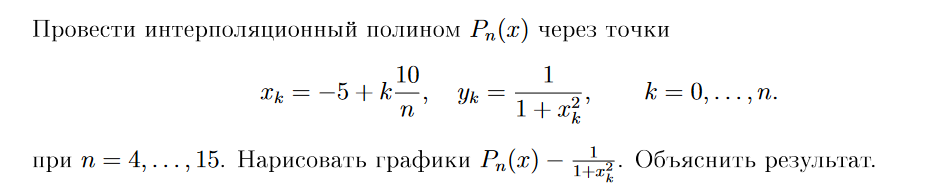

In [49]:
def Xk(k : int, n : int):
    return -5 + k * 10 / n

def Yk(Xk : float):
    return 1/(1+Xk**2)

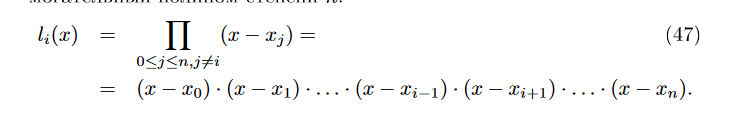

In [50]:
def l_i(X : np.ndarray, x : float,  i : int):
    X_masked = np.ma.array(x-X, mask=False)
    X_masked.mask[i]=True
    return np.prod(X_masked)

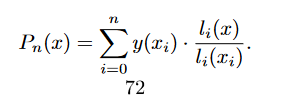


In [51]:
def Pn_Lagrange(X : np.ndarray, x : float, n : int):
    I = np.arange(0,n)
    res : float = 0.0
    for i in I:
        res += Yk(X[i])*l_i(X, x, i)/l_i(X, X[i], i)
#     res = np.sum(Yk(X[I])*l_i(X, x, I)/l_i(X, X[I], I))
    return res


In [60]:
N = np.arange(4,16)
N = np.append(N, 50)

figures = []
for n in N:
    K = np.arange(0, n+1)
    X = Xk(K, n)
    Y = Yk(X)
    x_grid = np.linspace(X[0], X[-1], 500)
    A = 1/(x_grid**2+1)
    y_grid = np.empty(len(x_grid))    
    for j in range(len(x_grid)):
        y_grid[j] = Pn_Lagrange(X, x_grid[j], n)
    figure = plt.figure()
    plt.title(f"N = {n}")
    plt.axhline(0, color='grey')
    plt.plot(X,Y, 'o', label='Xk')
    plt.plot(x_grid, y_grid, color='blue', label='Pn(X)')
    plt.plot(x_grid, A, '--', color='green', label='Y(X)')
    plt.plot(x_grid, y_grid-A, '--', color='red', label='Pn(X)-Y(X)')
    plt.legend()
    plt.close()
    figures.append(figure)

In [63]:
@widgets.interact(N1 = widgets.SelectionSlider(description='N',   options=N))
def show_figure(N1 = N):
    new_fig = plt.figure()
    new_manager = new_fig.canvas.manager
    i = np.where(N == N1)[0][0]
    new_manager.canvas.figure = figures[i]
    figures[i].set_canvas(new_manager.canvas)
    plt.ylim((-3,3))
    plt.show()



interactive(children=(SelectionSlider(description='N', options=(4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 50),…